In [105]:
!git clone https://github.com/vjrdy/BlackfridayOptimiser.git

import numpy as np # linear algebra
import pandas as pd # processing data 
import matplotlib.pyplot as plt 
import seaborn as sns # visualization tool
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fatal: le chemin de destination 'BlackfridayOptimiser' existe déjà et n'est pas un répertoire vide.


In [106]:
datadir = 'BlackfridayOptimiser'
dataset = pd.read_csv(os.path.join(datadir, 'BlackFriday.csv'))

In [107]:
# remove NaN values and set it to 0
dataset.Product_Category_2.fillna(0, inplace=True)
dataset.Product_Category_3.fillna(0, inplace=True)

# Categorised String data like City_Category, Age and Gender to numeric data
dataset['City_Category'] = dataset['City_Category'].astype('category').cat.codes
dataset['Age'] = dataset['Age'].astype('category').cat.codes
dataset['Gender'] = dataset['Gender'].astype('category').cat.codes
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('category').cat.codes
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969


# Course Resolution


In recommender systems, considering a matrix of user ratings for movies, matrix factorisation infers the latent characteristics of the movies and the affinity of users for each of them. Applications include signal decomposition, where a matrix of signals is decomposed into a set of base components along with a mixing matrix.  This lower rank approximation relies on an approximation of the latent factors and thus offers an insight on the problem.

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.


# Resolution 1: The gradient descent

The simplest way to compute the matrices $\mathbf{P}$ and $\mathbf{Q}$ is to use a gradient descent. It consists in initializing the estimated matrices randomly, compute their difference to the real data, and follow the gradient of the values to reach a minimum.


The goal here is to minimize the reconstruction error. The first step is to compute this error. 
    

In [108]:
# Separated input(X) and output(Y)
X = dataset.iloc[:, 2:-1]
Y = dataset.iloc[:, 11]
x_train = np.asarray(X)
Y_train = np.asarray(Y)
y_train = Y_train.reshape(537577,1)
print(x_train.shape)
print(y_train.shape)
print (X.dtypes)

(537577, 9)
(537577, 1)


In [110]:
def  cal_cost(theta,X,y):
    '''
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [111]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=200):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,10))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history


lr =0.01
n_iter = 2000

theta = np.random.randn(10,1)

X_b = np.c_[np.ones((len(x_train),1)),x_train]
theta,cost_history,theta_history = gradient_descent(X_b,y_train,theta,lr,n_iter)

print('Theta values:', theta)
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

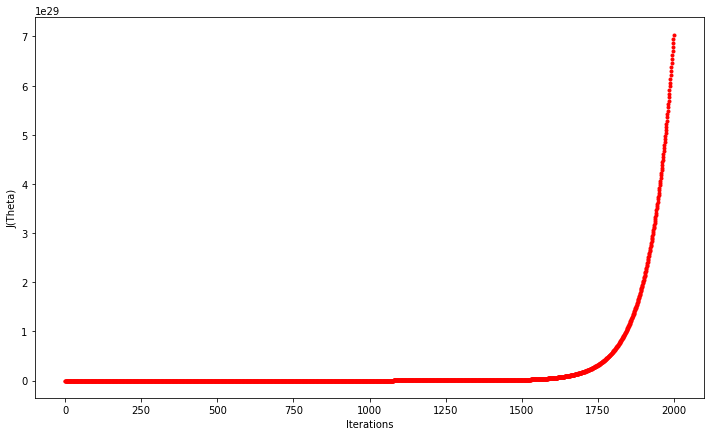

In [114]:
fig,ax = plt.subplots(figsize=(12,7))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
figure =ax.plot(range(n_iter),cost_history,'r.')

In [116]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [117]:
lr =0.5
n_iter = 50

theta = np.random.randn(10,1)

X_b = np.c_[np.ones((len(x_train),1)),x_train]
theta,cost_history = stocashtic_gradient_descent(X_b,y_train,theta,lr,n_iter)


print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))


print('Theta values:' ,theta)

Final cost/MSE:  5834958090943.784


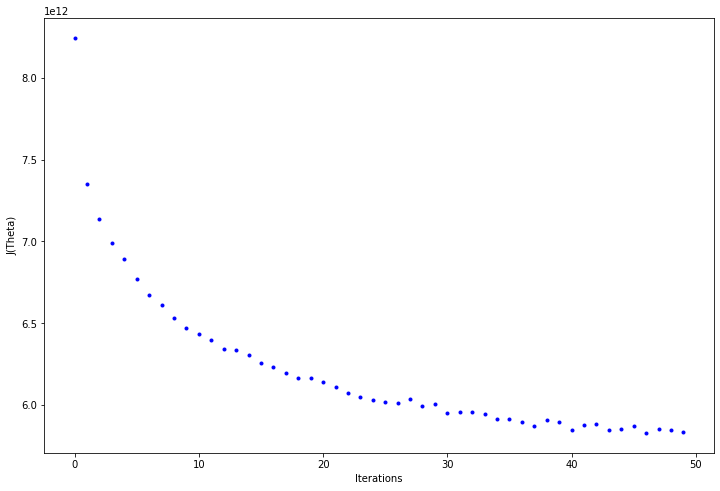

In [119]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
figure =ax.plot(range(n_iter),cost_history,'b.')

In [98]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [99]:
lr =0.1
n_iter = 200

theta = np.random.randn(10,1)


theta,cost_history = minibatch_gradient_descent(x_train,y_train,theta,lr,n_iter)


#print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Theta values :  ', theta)

Final cost/MSE:  117676484418757.641


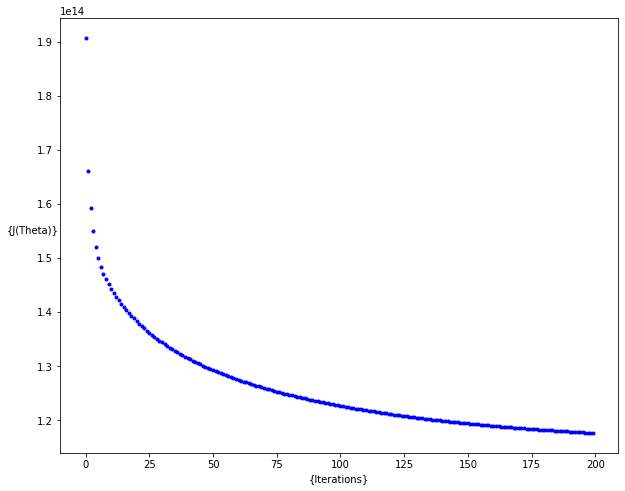

In [102]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

figure =ax.plot(range(n_iter),cost_history,'b.')
